In [1]:
cd ../

/mnt/Stuff/Acads/UGP/mycode


In [3]:
import numpy as np
import librosa
import librosa.display as display
import matplotlib.pyplot as plt
import IPython

In [2]:
sr = 22050

In [22]:
joel , er = librosa.load('/mnt/data/datasets/Bach10_v1.1/01-AchGottundHerr/01-AchGottundHerr.wav', sr = 22050)

In [23]:
stft = librosa.stft(joel,n_fft = int(0.1*sr),hop_length=220)

In [24]:
mag,ph = librosa.magphase(stft)
psd = np.abs(mag)**2


In [4]:
stuff = np.load('outputs/out_01-AchGottundHerr_split.npz')
HPHI_bg = stuff['arr_0']
HPHI_voc = stuff['arr_1']
HF0_bg = stuff['arr_2']
HF0_voc = stuff['arr_3']
WM = stuff['arr_4']
HM = stuff['arr_5']
SX = stuff['arr_6']

In [15]:
stuff = np.load('/mnt/Stuff/Acads/UGP/mycode/outputs/out_01-AchGottundHerr.npz')
HF0 = stuff['arr_5']
HPHI = stuff['arr_3']
HGAMMA = stuff['arr_2']

In [16]:
WGAMMA = np.load('Wgamma.npy')

In [5]:
ls

MyTrain.py*     extract_HF0.py*   nmf1/                    test_stuffs/
SIMM.py*        generate.py*      notebooks/               timbre.py*
WF.npy*         ground/           out_amy10.npz*           v.npy*
W_a.npz*        ground.py*        outputs/                 visual.py*
Wgamma.npy*     ground_list.txt*  outs.txt*                visual2.py*
__pycache__/    ground_voc/       parsing.py*              visual3.py*
amy_1_01.npz*   jaz.h5*           skeleton.py*             voc_Hg_c.npy*
bg_Hgamma.npy*  merge.py*         source_filter_model.py*  voc_Hgamma.npy*
bg_WPHI.npy*    model.h5*         stuff_jaz.npz*           voc_Hgamma_leon.npy*
bg_Wgamma.npy*  model.json*       stuff_lat.npz*           voc_WPHI.npy*
cordi*          my_model.py*      stuff_liz.npz*           voc_WPHI_c.npy*
create.py*      names.npy*        stuff_moz.npz*           voc_WPHI_leon.npy*


In [6]:
WPHI_amy = np.load('voc_WPHI.npy')

In [5]:
WPHI_violin = np.load('WPHI_violin.npy')

In [6]:
WF0 = np.load('WF.npy')

In [8]:
S_amy = np.dot(WPHI_amy , HPHI_voc) * np.dot(WF0 , HF0_voc)

In [7]:
S_amy = np.dot(WPHI_violin , HPHI_voc) * np.dot(WF0 , HF0_voc)

In [17]:
S_amy = np.dot(np.dot(WGAMMA , HGAMMA) , HPHI) * np.dot(WF0 , HF0)

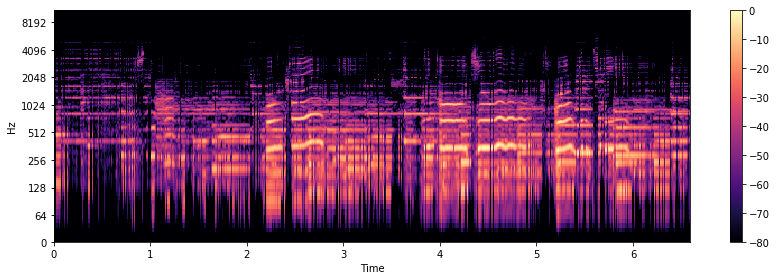

In [11]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(S_amy, ref=np.max),
                           y_axis='log',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

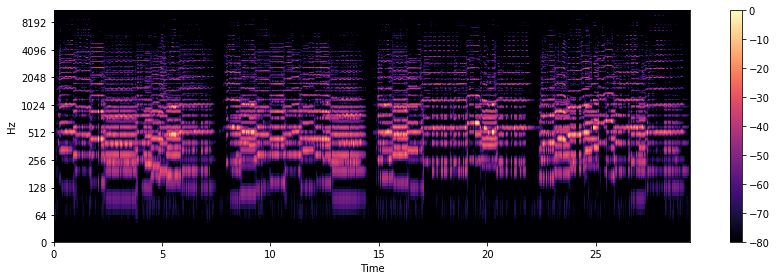

In [8]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(S_amy, ref=np.max),
                           y_axis='log',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

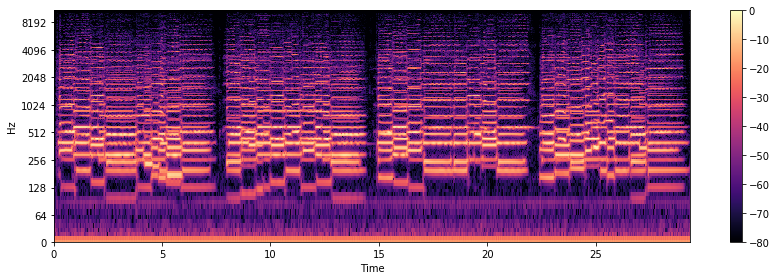

In [26]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(psd, ref=np.max),
                           y_axis='log',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

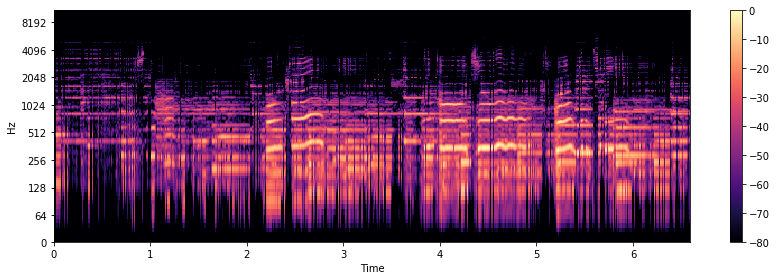

In [11]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(S_amy, ref=np.max),
                           y_axis='log',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

In [9]:
amy = librosa.istft(S_amy , hop_length = 441 , win_length = int(2*(S_amy.shape[0] - 1)))

In [10]:
v01 = librosa.istft(S_amy , hop_length = 220 , win_length = int(2*(S_amy.shape[0] - 1)))

In [19]:
v01_c = librosa.istft(S_amy , hop_length = 220 , win_length = int(2*(S_amy.shape[0] - 1)))

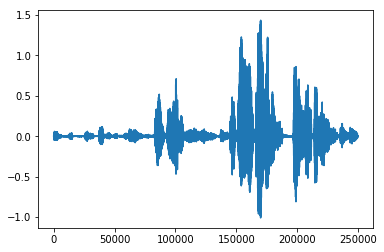

In [20]:
plt.plot(amy)

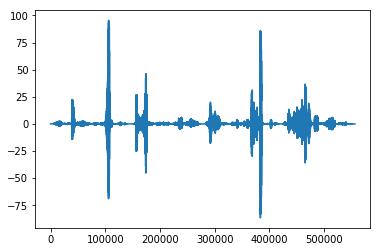

In [11]:
plt.plot(v01)

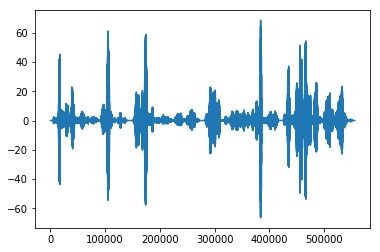

In [21]:
plt.plot(v01_c)

In [10]:
IPython.display.Audio(data=amy,rate=sr)

In [13]:
IPython.display.Audio(data=v01,rate=sr)

wiener filtering.

Sxv  = Sxv^ * Sx / (Sxv^ + Sxbg^ + residual)